In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# target= jordan
df = pd.read_csv('/content/drive/MyDrive/Time_Series/diet series.csv', skiprows=1)
print(df.head())
print(df.shape)
df.info()

     الشهر  diet: (الأردن)  gym: (الأردن)  finance: (الأردن)
0  2004-01               0              0                 26
1  2004-02              31              0                 92
2  2004-03              27              0                  0
3  2004-04             100              0                 20
4  2004-05              16              0                 16
(211, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   الشهر              211 non-null    object
 1   diet: (الأردن)     211 non-null    int64 
 2   gym: (الأردن)      211 non-null    int64 
 3   finance: (الأردن)  211 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.7+ KB


In [69]:
df.columns = ['date',  'diet', 'gym', 'finance']
df.head()

,date,diet,gym,finance
0,2004-01,0,0,26
1,2004-02,31,0,92
2,2004-03,27,0,0
3,2004-04,100,0,20
4,2004-05,16,0,16


In [70]:
df['date']= pd.to_datetime(df['date'])

In [71]:
df.index

RangeIndex(start=0, stop=211, step=1)

In [72]:
df= df.set_index('date')
df.tail()

,diet,gym,finance
date,,,
2021-03-01,4,5,4
2021-04-01,4,3,5
2021-05-01,3,5,4
2021-06-01,5,13,5
2021-07-01,4,13,4


Text(0.5, 0, 'date')

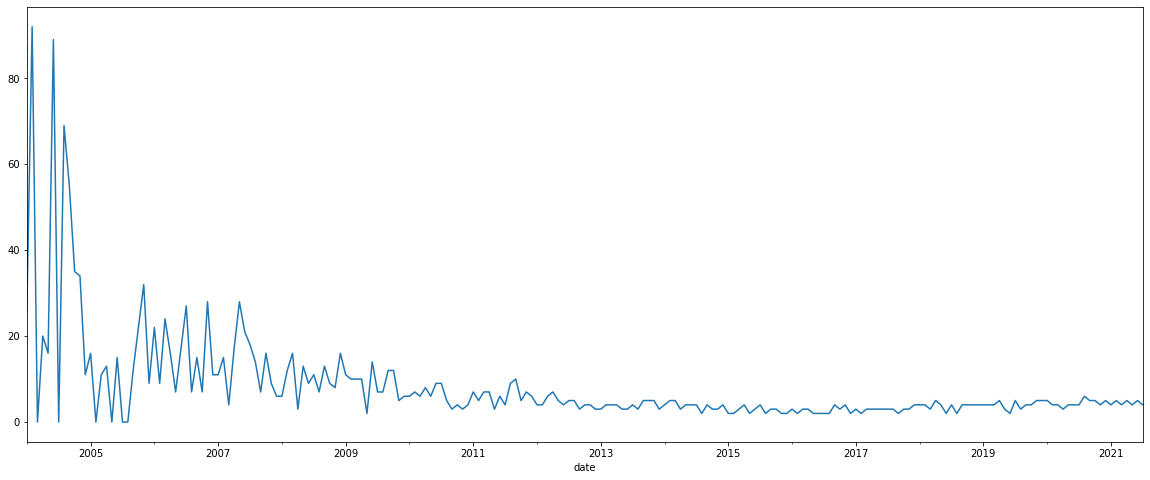

In [48]:
df['finance'].plot(figsize=(20,8))
plt.xlabel('date', fontsize=10)

Text(0.5, 0, 'date')

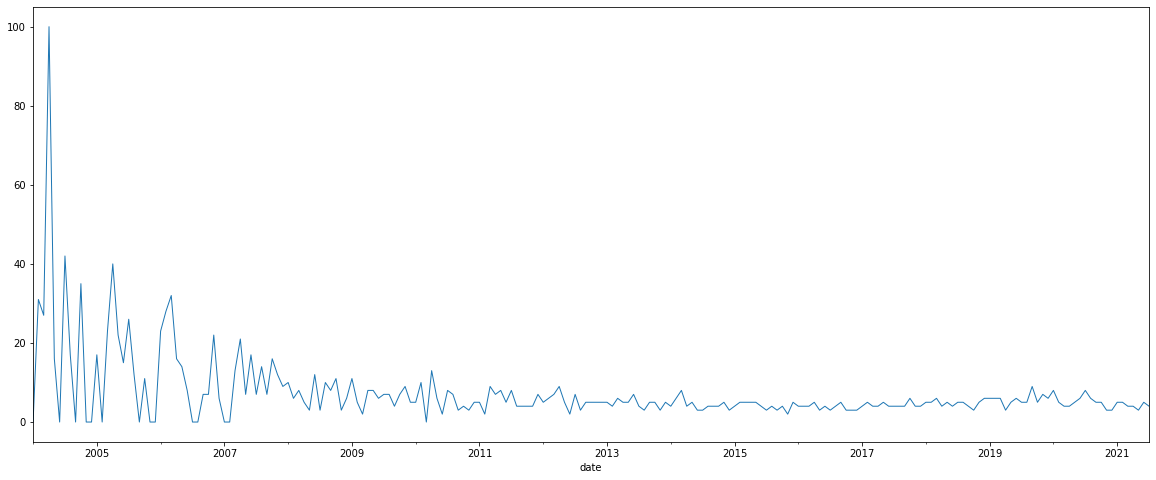

In [11]:
df['diet'].plot(figsize=(20,8), linewidth=1)
plt.xlabel('date', fontsize=10)

Text(0.5, 0, 'date')

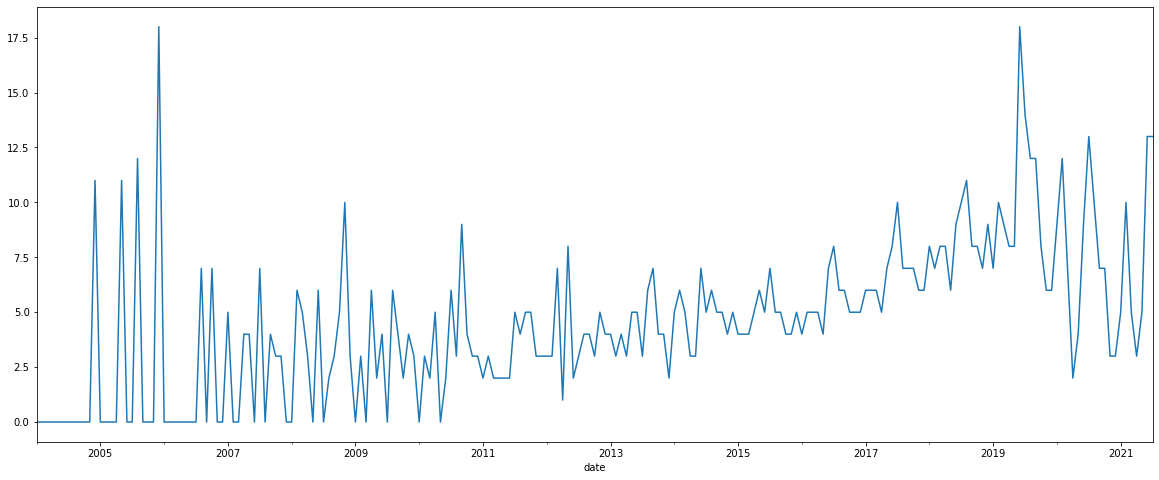

In [12]:
df['gym'].plot(figsize=(20,8))
plt.xlabel('date', fontsize=10)

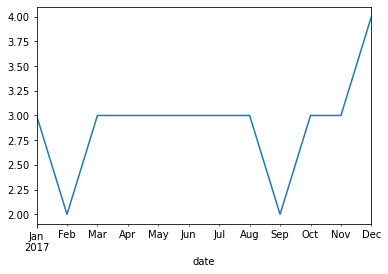

In [28]:
df.loc['2017', 'finance'].plot()

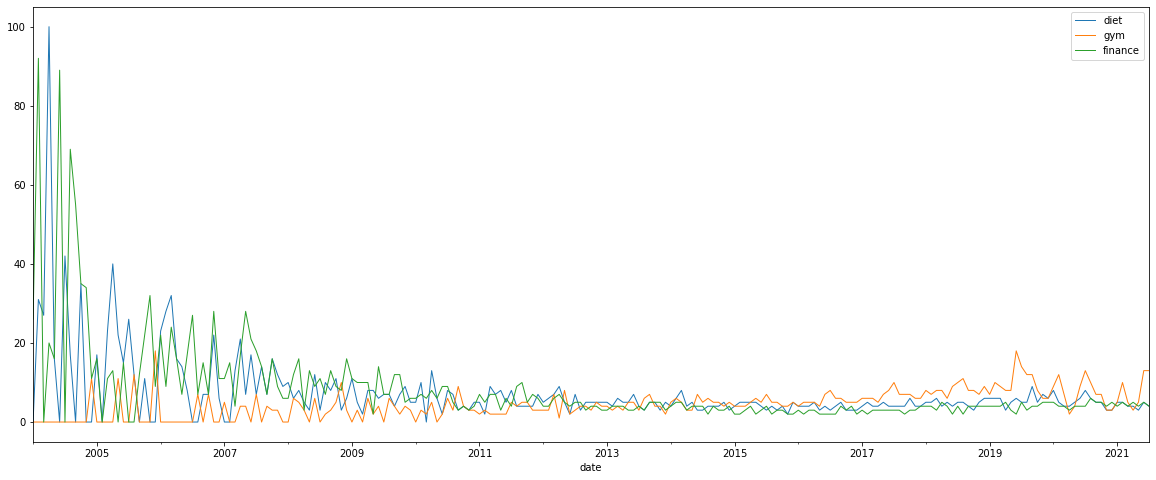

In [13]:
df.plot(figsize=(20,8) ,linewidth=1, fontsize=10)

plt.xlabel('date', fontsize=10);

In [14]:
diet = df[['diet']]
diet.rolling(12).mean()

,diet
date,
2004-01-01,NaN
2004-02-01,NaN
2004-03-01,NaN
2004-04-01,NaN
2004-05-01,NaN
...,...
2021-03-01,4.916667
2021-04-01,4.916667
2021-05-01,4.750000


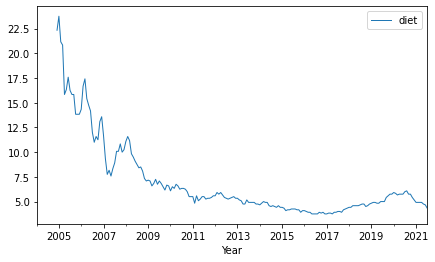

In [15]:
diet.rolling(12).mean().plot(figsize=(7,4), linewidth=1, fontsize=10)
plt.xlabel('Year', fontsize=10);

<Figure size 360x288 with 0 Axes>

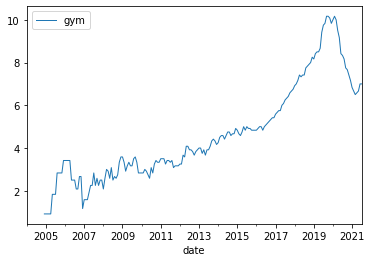

In [16]:
gym=df[['gym']]
plt.figure(figsize=(5,4))
gym.rolling(12).mean().plot(linewidth=1, fontsize=10)

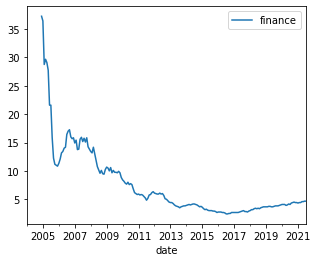

In [26]:
finance=df[['finance']]
finance.rolling(12).mean().plot(figsize=(5,4))

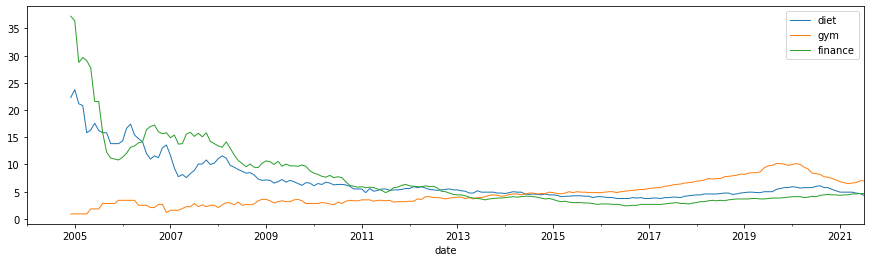

In [18]:
df_full = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean(),finance.rolling(12).mean()], axis=1)
df_full.plot(figsize=(15,4), linewidth=1, fontsize=10)
plt.xlabel('date', fontsize=10);

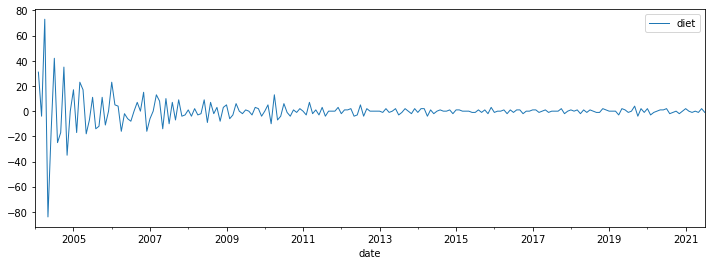

In [19]:
diet.diff().plot(figsize=(12,4), linewidth=1, fontsize=10)
plt.xlabel('date', fontsize=10);

             diet       gym   finance
diet     1.000000 -0.288119  0.234342
gym     -0.288119  1.000000 -0.376146
finance  0.234342 -0.376146  1.000000


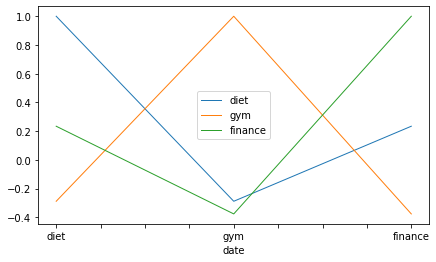

In [20]:
df.corr().plot(figsize=(7,4), linewidth=1, fontsize=10)
plt.xlabel('date', fontsize=10);
print(df.corr())

# **========================================================================================================================================**

In [59]:
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AR # auto regrition 
from statsmodels.tsa.arima_model import ARMA # auto regrition moving average
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.var_model import VAR
from random import random

In [73]:
diet=df[['diet']]

In [74]:
diet

,diet
date,
2004-01-01,0
2004-02-01,31
2004-03-01,27
2004-04-01,100
2004-05-01,16
...,...
2021-03-01,4
2021-04-01,4
2021-05-01,3


In [76]:
# fit model
ar_model = AR(diet)
ar_fitting= ar_model.fit()



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [99]:
# Make prediction
prid = ar_fitting.predict( start= 203, end = 215 )
print('Predicted value for Auto Regression ', prid)

Predicted value for Auto Regression  2020-12-01    4.440228
2021-01-01    5.062405
2021-02-01    5.259426
2021-03-01    5.352094
2021-04-01    5.415548
2021-05-01    5.304416
2021-06-01    4.776310
2021-07-01    5.513145
2021-08-01    4.831440
2021-09-01    4.751505
2021-10-01    4.568289
2021-11-01    4.093809
2021-12-01    3.953703
Freq: MS, dtype: float64


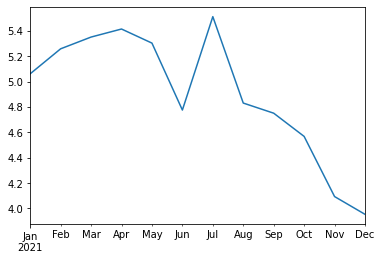

In [96]:
prid.plot()

In [101]:
arma = ARMA(diet, order=(2, 1))
arma_fit = arma.fit(disp=False)
# make prediction
pridict = arma_fit.predict( start= 203, end = 215 )
print('Predicted value for Moving Average 2,1 ',pridict)

Predicted value for Moving Average 2,1  2020-12-01    6.013436
2021-01-01    6.014696
2021-02-01    6.628588
2021-03-01    6.629268
2021-04-01    6.323632
2021-05-01    6.324602
2021-06-01    6.019257
2021-07-01    6.633148
2021-08-01    6.328461
2021-09-01    7.042673
2021-10-01    7.261739
2021-11-01    7.328926
2021-12-01    7.349527
Freq: MS, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
